In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D,Dropout

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
y_train[0]

5

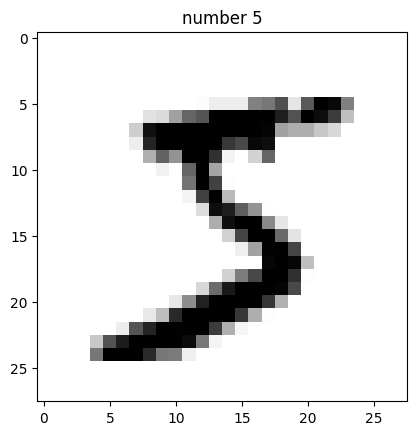

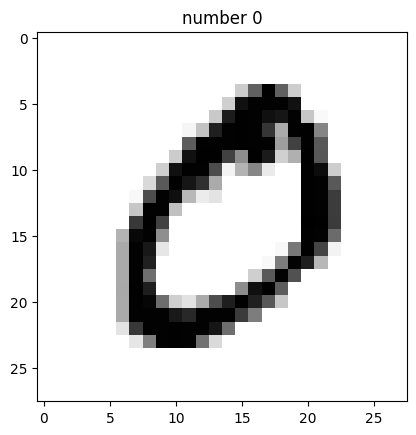

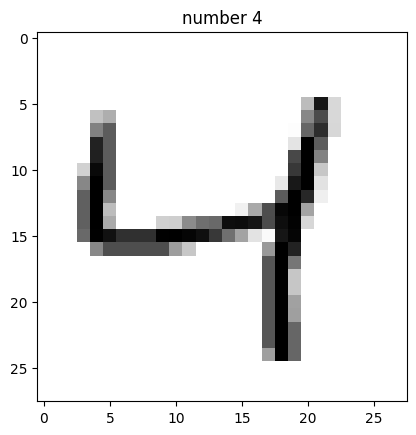

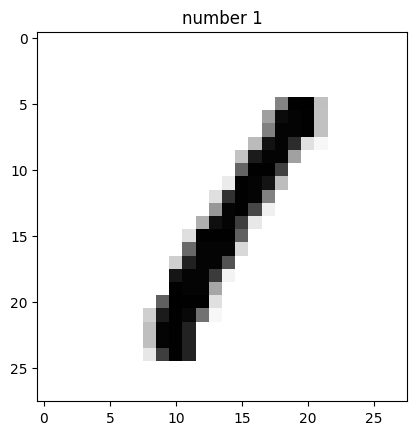

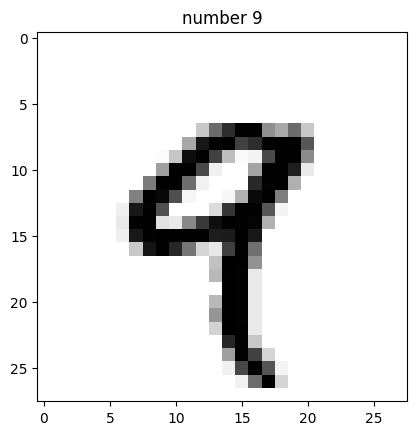

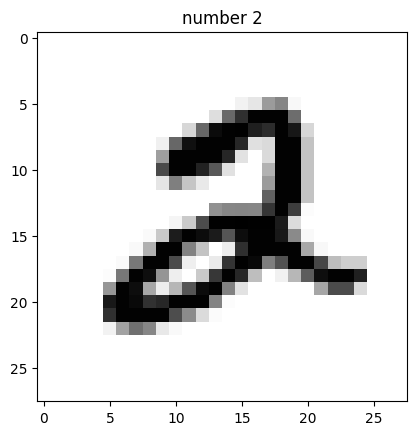

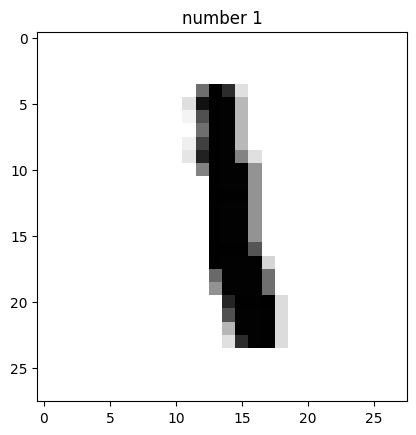

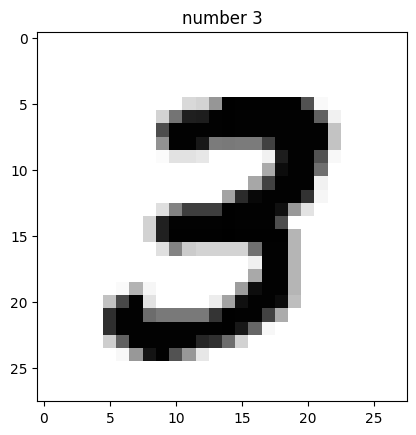

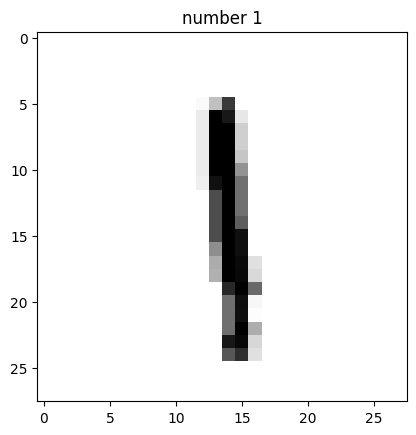

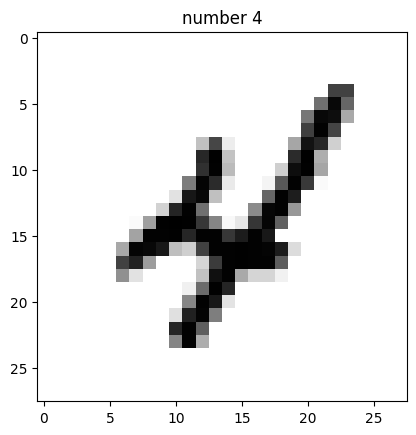

In [5]:
for i in range(10):
  plt.imshow(X_train[i], cmap = 'binary')
  plt.title(f"number {y_train[i]}")
  plt.show()

In [6]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

In [8]:
X_train = X_train.reshape((60000,28, 28, 1))
X_test = X_test.reshape((10000,28, 28, 1))

In [9]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [12]:
# y_train = y_train[:, :, 0]

In [13]:
y_train.shape

(60000, 10)

In [14]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D((2,2)))
# model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [16]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'] )

In [17]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [18]:
his = model.fit(X_train, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 66s 46ms/step - loss: 0.2130 - accuracy: 0.9366 - val_loss: 0.0803 - val_accuracy: 0.9758
Epoch 2/5
1313/1313 [==============================] - 48s 37ms/step - loss: 0.0733 - accuracy: 0.9767 - val_loss: 0.0588 - val_accuracy: 0.9826
Epoch 3/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0474 - val_accuracy: 0.9859
Epoch 4/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0449 - val_accuracy: 0.9864
Epoch 5/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0457 - val_accuracy: 0.9866


In [19]:
model.save('handwritten.model')

In [20]:
model = keras.models.load_model('handwritten.model')

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0362 - accuracy: 0.9887


In [26]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


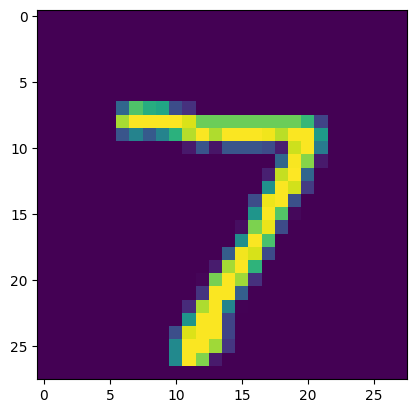

In [27]:
plt.imshow(X_test[0])

In [28]:
np.argmax(predictions[0])

7

In [22]:
print(loss)

0.036200422793626785


In [23]:
print(accuracy)

0.9886999726295471


In [24]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


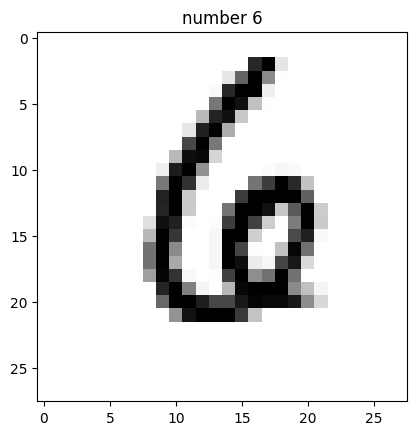

In [31]:
plt.imshow(X_test[123], cmap = 'binary')
plt.title(f"number {np.argmax(predictions[123])}")
plt.show()

In [91]:
import cv2
img = cv2.imread("/content/drive/MyDrive/digits/digit7.png")

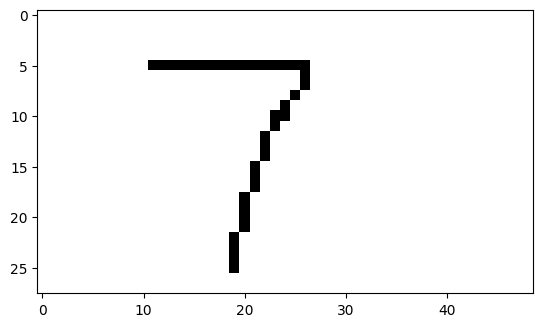

In [92]:
plt.imshow(img)

In [93]:
img.shape

(28, 49, 3)

In [94]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [95]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [96]:
newimg = keras.utils.normalize(resized, axis = 1)

In [97]:
newimg = np.array(newimg).reshape(-1, 28,28,1)

In [98]:
pred = model.predict(newimg)

1/1 [==============================] - 0s 23ms/step


In [99]:
np.argmax(pred)

7